In [21]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression, PoissonRegressor

In [3]:
scan_path = "/media/fruitspec-lab/TEMP SSD/El_Rom_may312023/guyu/310523"
relevnat_rows = [f"row_{i}" for i in range(11,15)]
speed = [2,4,5,6]
results_df = []
max_depth = 5

In [4]:
for row, row_speed in zip(relevnat_rows, speed):
    row_path = os.path.join(scan_path, row)
    for scan in os.listdir(row_path):
        row_scan_path = os.path.join(row_path, scan)
        tracks_path = os.path.join(row_scan_path, "tracks.csv")
        df = pd.read_csv(tracks_path)
        df = df[df['depth']<max_depth]
        uniq, counts = np.unique(df["track_id"], return_counts=True)
        results_df.append({"row": row,
                          "scan": int(scan),
                          "speed": row_speed,
                           "side": "A" if int(scan)%2 else "B",
                           "cv": len(uniq),
                          "cv2": len(uniq[counts >=2]),
                          "cv3": len(uniq[counts >=3])})
results_df = pd.DataFrame(results_df)

In [5]:
results_df

,row,scan,speed,side,cv,cv2,cv3
0,row_11,1,2,A,17970,12399,10091
1,row_11,2,2,B,18586,13395,11270
2,row_11,3,2,A,17575,12354,10135
3,row_11,4,2,B,18810,13507,11329
4,row_12,1,4,A,10635,6948,5051
5,row_12,2,4,B,12102,8080,6040
6,row_12,3,4,A,10020,6530,4731
7,row_12,4,4,B,11671,7845,5766
8,row_13,1,5,A,8468,4385,2564
9,row_13,2,5,B,10037,5465,3348


In [5]:
cv_cols = ["cv", "cv2", "cv3"]
scan_1 = results_df.loc[results_df["scan"] == 1, cv_cols].reset_index(drop=True)
scan_2 = results_df.loc[results_df["scan"] == 2, cv_cols].reset_index(drop=True)
scan_3 = results_df.loc[results_df["scan"] == 3, cv_cols].reset_index(drop=True)
scan_4 = results_df.loc[results_df["scan"] == 4, cv_cols].reset_index(drop=True)
side_A_diff = scan_1 - scan_3
side_B_diff = scan_2 - scan_4
side_A_diff_per = (side_A_diff.abs()*100/scan_1).round(2)
side_B_diff_per = (side_B_diff.abs()*100/scan_2).round(2)

side_A_diff["speed"] = speed
side_B_diff["speed"] = speed

side_A_diff["side"] = "A"
side_B_diff["side"] = "B"

side_A_diff = side_A_diff[["speed", "side"] + cv_cols]
side_B_diff = side_B_diff[["speed", "side"] + cv_cols]

side_A_diff.rename({"cv": "diff_cv","cv2": "diff_cv2", "cv3": "diff_cv3"}, axis =1, inplace =True)
side_B_diff.rename({"cv": "diff_cv","cv2": "diff_cv2", "cv3": "diff_cv3"}, axis =1, inplace =True)
side_A_diff_per.rename({"cv": "abs_percent_diff_cv","cv2": "abs_percent_cv2", "cv3": "abs_percent_cv3"}, axis =1, inplace =True)
side_B_diff_per.rename({"cv": "abs_percent_diff_cv","cv2": "abs_percent_cv2", "cv3": "abs_percent_cv3"}, axis =1, inplace =True)

side_A = pd.concat([side_A_diff, side_A_diff_per], axis = 1)
side_B = pd.concat([side_B_diff, side_B_diff_per], axis = 1)
pd.concat([side_A, side_B]).sort_values("speed").set_index("speed")

,side,diff_cv,diff_cv2,diff_cv3,abs_percent_diff_cv,abs_percent_cv2,abs_percent_cv3
speed,,,,,,,
2,A,395,45,-44,2.20,0.36,0.44
2,B,-224,-112,-59,1.21,0.84,0.52
4,A,615,418,320,5.78,6.02,6.34
4,B,431,235,274,3.56,2.91,4.54
5,A,-20,-35,-58,0.24,0.80,2.26
5,B,-703,-527,-358,7.00,9.64,10.69
6,A,241,-11,-14,3.69,0.38,0.90
6,B,-259,-120,-127,3.11,2.79,5.20


In [6]:
mean_cv = results_df.groupby(["speed","side"])[["cv","cv2", "cv3"]].mean().round().astype(int)
std_cv = results_df.groupby(["speed","side"])[["cv","cv2", "cv3"]].std().round().astype(int)
coef_vareation = std_cv/mean_cv
coef_vareation = (coef_vareation*100).round(2)

In [7]:
coef_vareation

cv   cv2   cv3
speed side                  
2     A     1.57  0.26  0.31
      B     0.85  0.59  0.37
4     A     4.21  4.39  4.62
      B     2.57  2.08  3.29
5     A     0.17  0.57  1.58
      B     4.78  6.51  7.17
6     A     2.65  0.28  0.64
      B     2.16  1.95  3.59

In [8]:
mean_cv.rename({"cv": "mean_cv","cv2": "mean_cv2",
                    "cv3": "mean_cv3"}, axis =1, inplace =True)
std_cv.rename({"cv": "std_cv","cv2": "std_cv2",
                    "cv3": "std_cv3"}, axis =1, inplace =True)
coef_vareation.rename({"cv": "COV_cv","cv2": "COV_cv_2",
                    "cv3": "COV_cv3"}, axis =1, inplace =True)
summary_df = pd.concat([mean_cv, std_cv, coef_vareation], axis =1)
summary_df

mean_cv  mean_cv2  mean_cv3  std_cv  std_cv2  std_cv3  COV_cv  \
speed side                                                                  
2     A       17772     12376     10113     279       32       31    1.57   
      B       18698     13451     11300     158       79       42    0.85   
4     A       10328      6739      4891     435      296      226    4.21   
      B       11886      7962      5903     305      166      194    2.57   
5     A        8478      4402      2593      14       25       41    0.17   
      B       10388      5728      3527     497      373      253    4.78   
6     A        6414      2896      1559     170        8       10    2.65   
      B        8464      4356      2504     183       85       90    2.16   

            COV_cv_2  COV_cv3  
speed side                     
2     A         0.26     0.31  
      B         0.59     0.37  
4     A         4.39     4.62  
      B         2.08     3.29  
5     A         0.57     1.58  
      B         6.51     7.17  
6     A         0.28     0.64  
      B         1.95     3.59

In [9]:
lens_comp_path = "/media/fruitspec-lab/TEMP SSD/El_Rom_may312023/83vs61.csv"
lens_df = pd.read_csv(lens_comp_path)
lens_df_comp = 100*lens_df[lens_df["lens"] == 83][["cv2", "cv3"]].reset_index(drop=True)/lens_df[lens_df["lens"] == 61][["cv2", "cv3"]].reset_index(drop=True)
lens_df_comp = lens_df_comp.round(2)
lens_df_comp

,cv2,cv3
0,13.76,11.55
1,10.73,12.88
2,9.79,7.17
3,13.42,9.52
4,17.05,15.63
5,12.36,9.87
6,13.58,12.50
7,7.20,5.35
8,7.71,5.37


In [10]:
lens_df_comp.mean()

cv2    11.733333
cv3     9.982222
dtype: float64

# F_modeling

### Load data

In [71]:
df_f_path = "/media/fruitspec-lab/TEMP SSD/USA_June/df_f_new_det.csv"

In [72]:
df_f_org = pd.read_csv(df_f_path)

In [73]:
# # F_V is counting both trees
# new_f_vals = df_f_org[~df_f_org["F_V"].isna()]["F_V"].values
# df_f_org.loc[~df_f_org["F_V"].isna(), "F"] = new_f_vals

In [74]:
cv_cols = [f"cv{i}" for i in range(1,4)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [75]:
cv_cols_old = [f"old_cv{i}" for i in range(1,4)]
cv_F_cols_old = [f"{col}/F" for col in cv_cols_old]
for cv_col, cv_F_col in zip(cv_cols_old, cv_F_cols_old):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [76]:
df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

In [77]:
# filtering
df_f_org = df_f_org[df_f_org["speed"]==2.5]

In [78]:
df_f_org.groupby("group").count()

,Unnamed: 0,june_date,tree,block,speed,depth_filter,plant_dist,n_trees,sec_length,section,...,size,old_cv1,old_cv2,old_cv3,cv1/F,cv2/F,cv3/F,old_cv1/F,old_cv2/F,old_cv3/F
group,,,,,,,,,,,,,,,,,,,,,
1,0,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,0,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
4,30,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
5,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
6,9,9,9,9,9,9,9,9,9,9,...,4,4,4,4,9,9,9,4,4,4
9,7,7,7,7,7,7,7,7,7,7,...,4,4,4,4,7,7,7,4,4,4
10,0,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
11,5,5,5,5,5,5,5,5,5,5,...,0,0,0,0,5,5,5,0,0,0


### Short EDA

In [79]:
df_f_org[cv_F_cols].mean()

cv1/F    1.922646
cv2/F    1.103005
cv3/F    0.830905
dtype: float64

In [80]:
display(df_f_org.groupby("speed")[cv_F_cols].mean())
display(df_f_org.groupby("speed")[cv_F_cols].std())

,cv1/F,cv2/F,cv3/F
speed,,,
2.5,1.922646,1.103005,0.830905


,cv1/F,cv2/F,cv3/F
speed,,,
2.5,0.659975,0.320609,0.224219


In [81]:
display(df_f_org.groupby("speed")[cv_F_cols_old].mean())
display(df_f_org.groupby("speed")[cv_F_cols_old].std())

,old_cv1/F,old_cv2/F,old_cv3/F
speed,,,
2.5,1.152975,0.925186,0.777801


,old_cv1/F,old_cv2/F,old_cv3/F
speed,,,
2.5,0.414382,0.348629,0.304036


In [82]:
display(df_f_org.groupby("type")[cv_F_cols].mean())
display(df_f_org.groupby("type")[cv_F_cols].std())

,cv1/F,cv2/F,cv3/F
type,,,
Spindle,1.815864,1.048589,0.796946
Spindle-Young,3.158681,1.507713,1.073685
Traditional,1.550558,0.950054,0.715019
V_Shape,1.621806,0.999348,0.774786


,cv1/F,cv2/F,cv3/F
type,,,
Spindle,0.530347,0.272810,0.201041
Spindle-Young,0.987111,0.304903,0.223149
Traditional,0.566058,0.308728,0.182903
V_Shape,0.346979,0.300801,0.211794


In [83]:
display(df_f_org.groupby("group")[cv_F_cols].mean())
display(df_f_org.groupby("group")[cv_F_cols].std())

,cv1/F,cv2/F,cv3/F
group,,,
1,1.957568,1.158946,0.892200
2,3.158681,1.507713,1.073685
3,1.718236,1.122871,0.906861
4,1.713518,0.947054,0.705923
5,2.095221,1.194315,0.887768
6,2.112622,1.212944,0.873466
9,2.165670,1.469399,1.114076
10,1.550558,0.950054,0.715019
11,1.863753,1.130802,0.854725


,cv1/F,cv2/F,cv3/F
group,,,
1,0.503899,0.233685,0.169240
2,0.987111,0.304903,0.223149
3,0.478434,0.273511,0.197164
4,0.567695,0.274036,0.192187
5,0.301304,0.157188,0.103144
6,0.772059,0.448489,0.269722
9,0.574725,0.428598,0.273559
10,0.566058,0.308728,0.182903
11,0.430579,0.264321,0.147302


In [84]:
display(df_f_org.groupby("type")[cv_F_cols_old].mean())
display(df_f_org.groupby("type")[cv_F_cols_old].std())

,old_cv1/F,old_cv2/F,old_cv3/F
type,,,
Spindle,1.089606,0.904613,0.764366
Spindle-Young,2.061453,1.332371,1.072786
Traditional,0.960621,0.789688,0.637711
V_Shape,1.151228,0.820837,0.699113


,old_cv1/F,old_cv2/F,old_cv3/F
type,,,
Spindle,0.322275,0.345546,0.307519
Spindle-Young,0.585480,0.268450,0.212808
Traditional,0.284072,0.289743,0.255179
V_Shape,0.221613,0.159339,0.137273


In [85]:
df_f_org.groupby(["speed", "block"])[cv_F_cols].mean()

cv1/F     cv2/F     cv3/F
speed block                                  
2.5   ELROM000   1.718236  1.122871  0.906861
      GC-1       2.068983  1.190208  0.903986
      GC-2       2.132705  1.200182  0.864599
      HC-1-blk4  3.158681  1.507713  1.073685
      HC3        1.863753  1.130802  0.854725
      HC4        2.112622  1.212944  0.873466
      HC_1       1.326340  0.770212  0.571255
      HC_2       1.346934  0.758126  0.553576
      MEROMBLO   2.013765  1.089847  0.816893
      ORG8       1.550558  0.950054  0.715019
      RV1        2.165670  1.469399  1.114076
      SDTF05PK   2.074462  1.153889  0.873323
      SDTF05ZA   1.801710  1.165689  0.917369

In [86]:
df_f_org.groupby(["speed", "block"])[cv_F_cols_old].mean()

old_cv1/F  old_cv2/F  old_cv3/F
speed block                                     
2.5   ELROM000    1.311462   1.192204   1.065328
      GC-1        0.913825   0.607945   0.497415
      GC-2        0.766089   0.500408   0.405135
      HC-1-blk4   2.061453   1.332371   1.072786
      HC3              NaN        NaN        NaN
      HC4         1.067756   0.724710   0.610474
      HC_1        0.688744   0.486943   0.395616
      HC_2        0.761629   0.523742   0.427590
      MEROMBLO    1.198878   1.038806   0.873016
      ORG8        0.960621   0.789688   0.637711
      RV1         1.234699   0.916963   0.787752
      SDTF05PK    1.359529   1.172519   0.977291
      SDTF05ZA    1.327518   1.187589   1.012200

In [87]:
df_f_org.groupby("side")[cv_F_cols].mean()

,cv1/F,cv2/F,cv3/F
side,,,
A,1.919852,1.114119,0.845026
B,1.925650,1.091057,0.815725


In [189]:
# sns.lmplot(data = df_f_org[df_f_org["depth_filter"] == 5], x = "F", y = "cv2/F")

In [190]:
# sns.lmplot(data = df_f_org[df_f_org["depth_filter"] == 5], x = "fruit/feet", y = "cv2/F")

In [191]:
# sns.lmplot(data = df_f_org[df_f_org["depth_filter"] == 5], x = "F", y = "fruit/feet", hue = "plant_dist")

### CV-F graphs

In [192]:

# df = df_f_org.copy()
# col = 'cv2'
# df["Predicted F"] = 0.8586869 * df[col]
# col = 'Predicted F'
# max_val = np.min(np.max(df[[col, "F"]].values, axis=0))

# plt.figure(figsize=(10, 6))  # Adjust figure size

# # Enable grid lines
# sns.set_style("whitegrid")

# ax = sns.lmplot(data=df, x=col, y="F", palette="Blues")  # Customize color palette
# sns.regplot(data=df, x=col, y="F", scatter_kws={'s': 5}, order=1, ci=0, ax=ax.axes[0, 0],
#             x_ci=0, color="black", line_kws={"ls": "--"},scatter=False)  # Adjust scatter marker size and line style

# plt.xlim(0, np.max(df[col] * 1.1))  # Adjust x-axis limits
# plt.ylim(0, np.max(df["F"] * 1.1))  # Adjust y-axis limits

# plt.xlabel("Predicted F")  # Set x-axis label
# plt.ylabel("F")  # Set y-axis label
# plt.title("F ~ Predicted F")  # Set plot title

# plt.show()

<Figure size 1000x600 with 0 Axes>

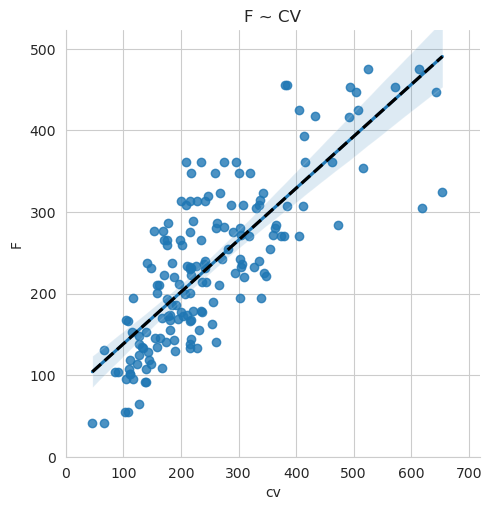

In [88]:

df = df_f_org.copy()
col = 'cv2'
max_val = np.min(np.max(df[[col, "F"]].values, axis=0))

plt.figure(figsize=(10, 6))  # Adjust figure size

# Enable grid lines
sns.set_style("whitegrid")

ax = sns.lmplot(data=df, x=col, y="F", palette="Blues")  # Customize color palette
sns.regplot(data=df, x=col, y="F", scatter_kws={'s': 5}, order=1, ci=0, ax=ax.axes[0, 0],
            x_ci=0, color="black", line_kws={"ls": "--"},scatter=False)  # Adjust scatter marker size and line style

plt.xlim(0, np.max(df[col] * 1.1))  # Adjust x-axis limits
plt.ylim(0, np.max(df["F"] * 1.1))  # Adjust y-axis limits

plt.xlabel("cv")  # Set x-axis label
plt.ylabel("F")  # Set y-axis label
plt.title("F ~ CV")  # Set plot title

plt.show()

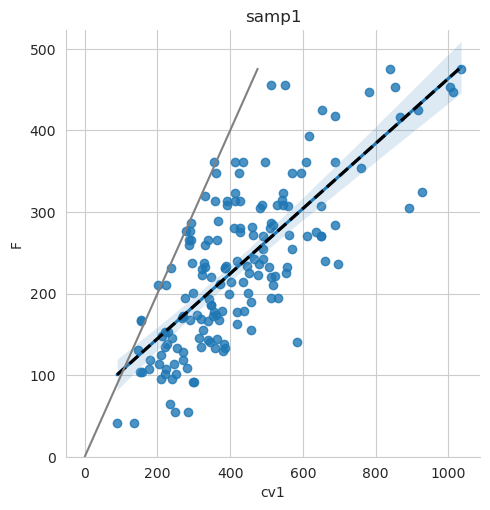

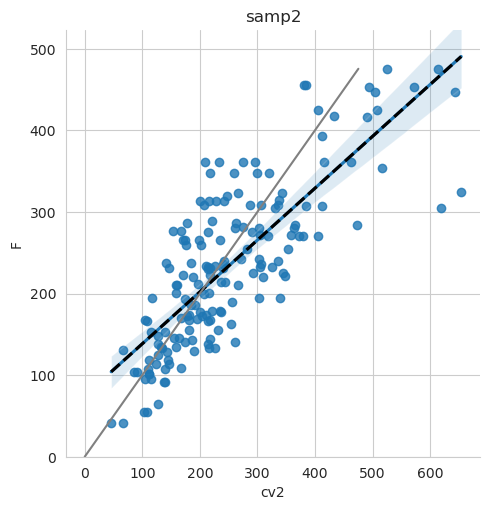

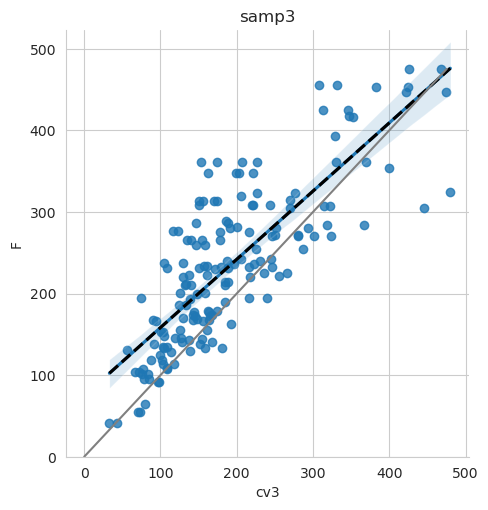

In [89]:
def plot_F_cv(df,min_samp = "", hue = None, title= "", col = ""):
    if col == "":
        col = f"cv{min_samp}"
    max_val = np.min(np.max(df[[col, "F"]].values, axis = 0))
    ax = sns.lmplot(data = df, x = col, y="F", hue = hue)
    sns.regplot(data = df, x = col, y="F", scatter_kws={'s':2}, order = 1,ci=0, ax=ax.axes[0,0],
               x_ci = 0, color = "black", line_kws={"ls":"--"},scatter=False)
    plt.plot([0, max_val], [0, max_val], color='grey')
    plt.ylim(0, np.max(df["F"]*1.1))
    plt.title(title)
    plt.show()
df_f = df_f_org.copy()
df_f["side_speed"] = df_f.apply(lambda x: f'{x["side"]}_{x["speed"]}', axis =1)
df_f["block_speed"] = df_f.apply(lambda x: f'{x["block"]}_{x["speed"]}', axis =1)
dropped_outlier_frame = df_f
for i in range(1,4)    :
    plot_F_cv(df_f,i, title = f"samp{i}")
    

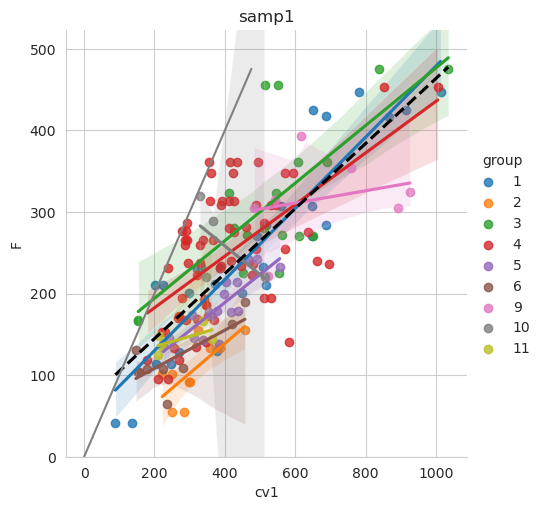

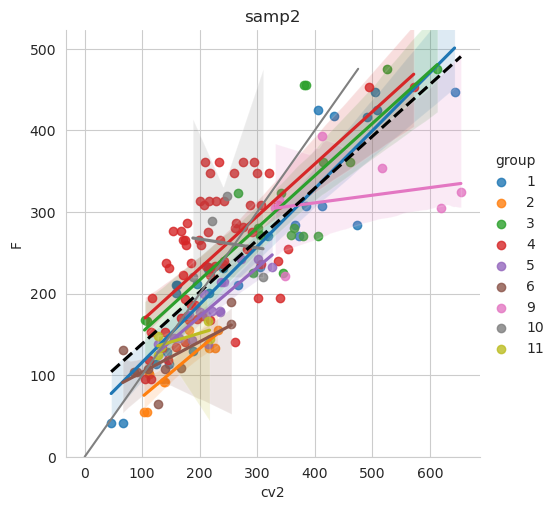

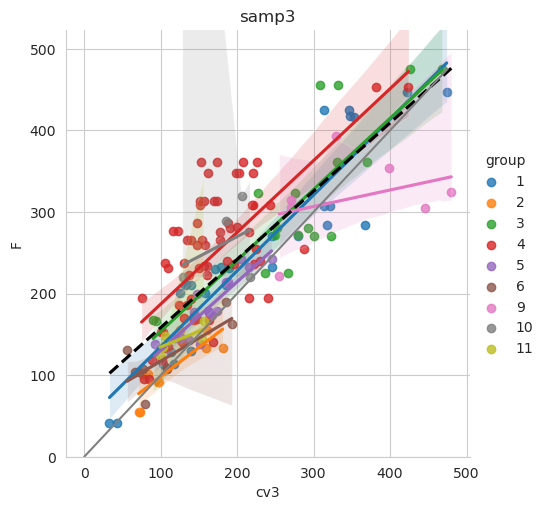

In [90]:
for i in range(1,4)    :
    plot_F_cv(df_f,i,"group", f"samp{i}")

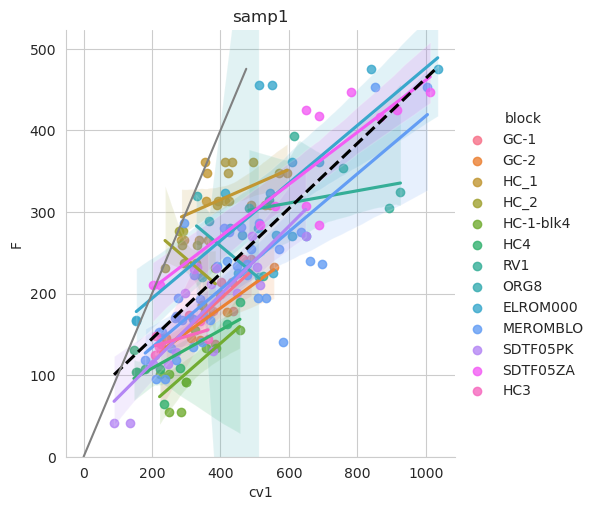

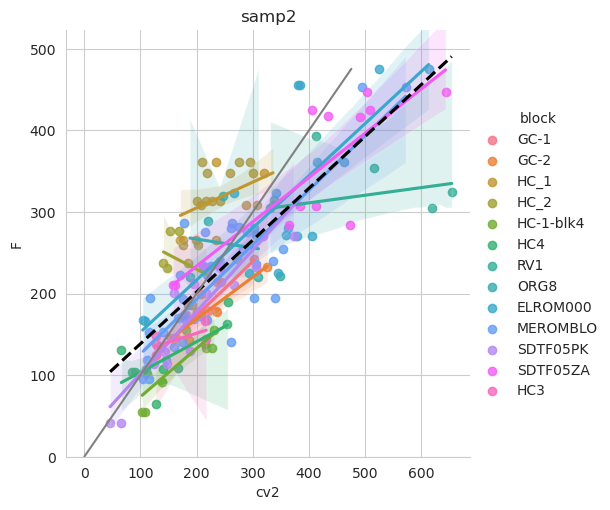

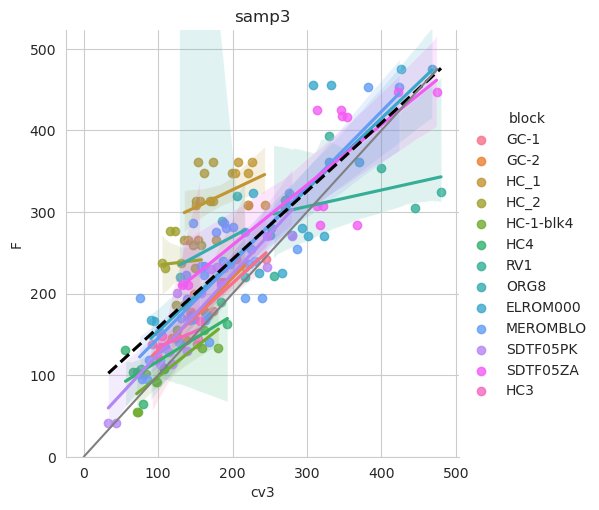

In [91]:
for i in range(1,4)    :
    plot_F_cv(df_f,i,"block", f"samp{i}")

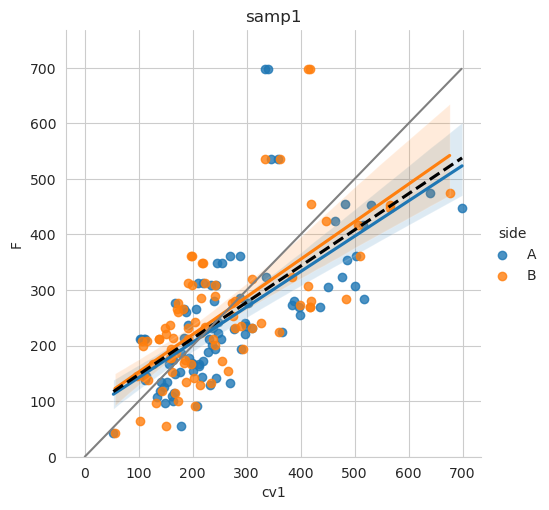

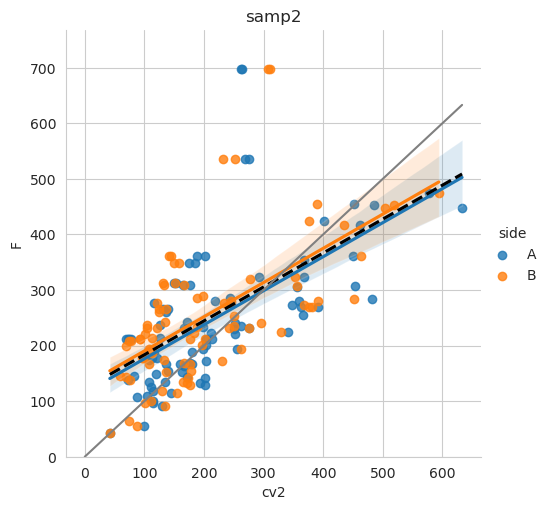

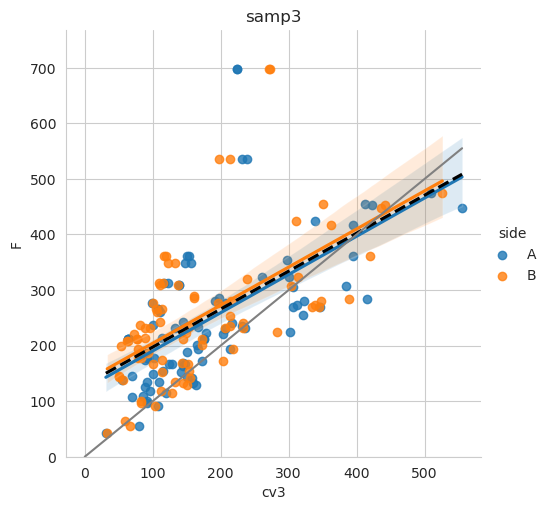

In [251]:
for i in range(1,4)    :
    plot_F_cv(df_f,i,"side", f"samp{i}")

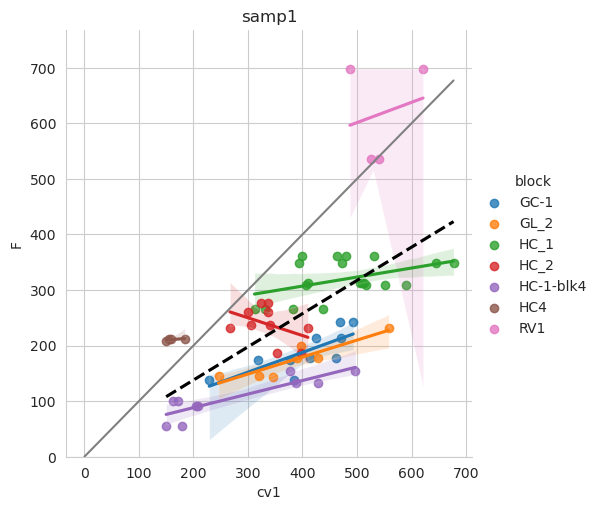

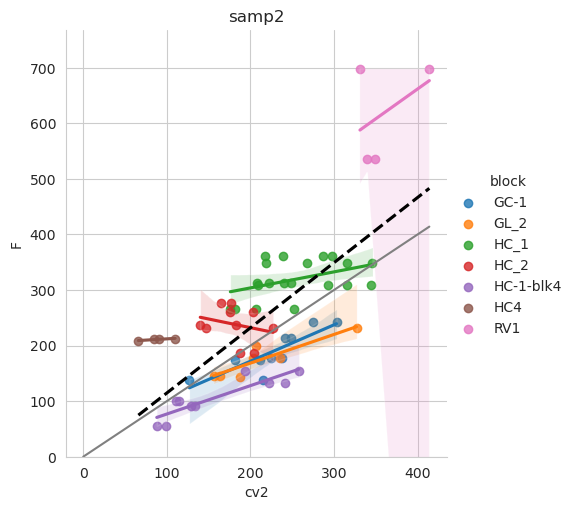

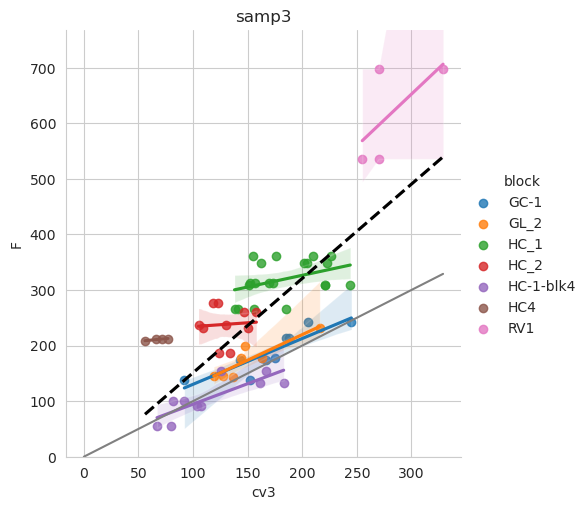

In [197]:
for i in range(1,4)    :
    plot_F_cv(df_f[~df_f["cv1"].isna()],i,"block", f"samp{i}")

In [92]:
df_f["block"].unique()

array(['GC-1', 'GC-2', 'HC_1', 'HC_2', 'HC-1-blk4', 'HC4', 'RV1', 'ORG8',
       'ELROM000', 'MEROMBLO', 'SDTF05PK', 'SDTF05ZA', 'HC3'],
      dtype=object)

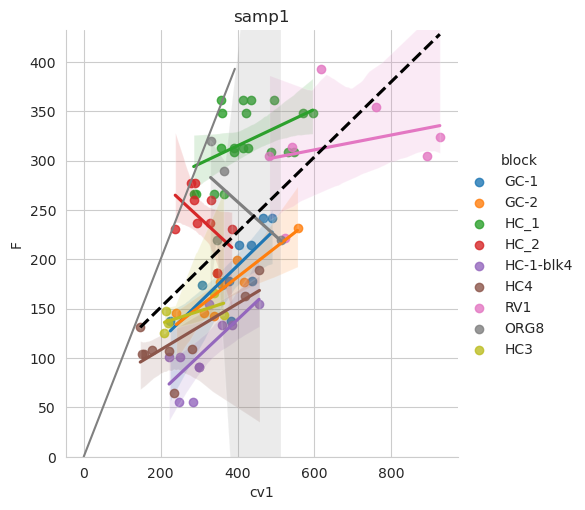

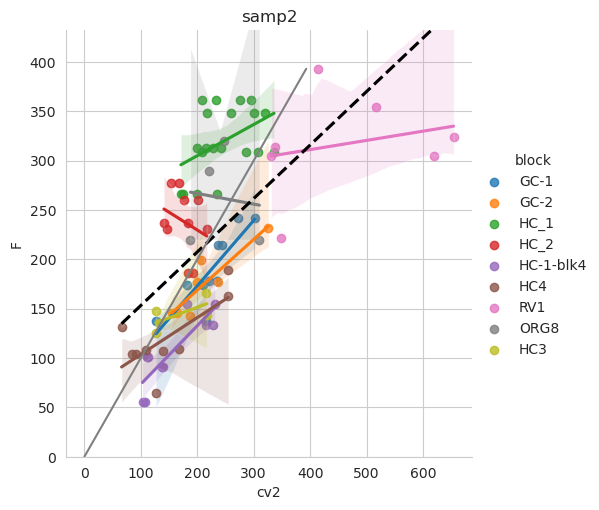

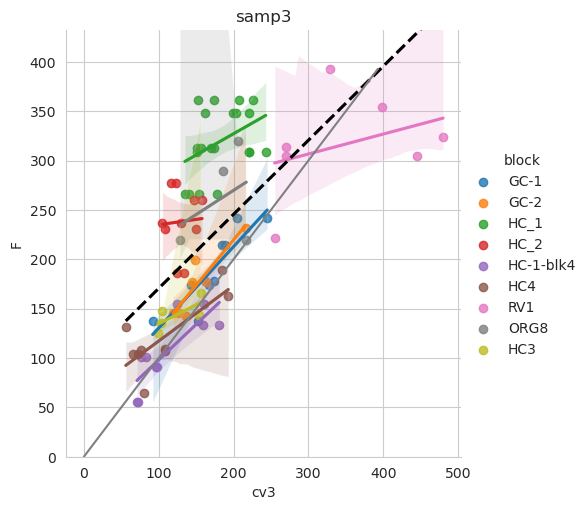

In [93]:
for i in range(1,4):
    plot_F_cv(df_f[~df_f["cv1"].isna()][~df_f["block"].isin(["ELROM000", "MEROMBLO", "SDTF05PK", "SDTF05ZA"])],i,"block", f"samp{i}")
    

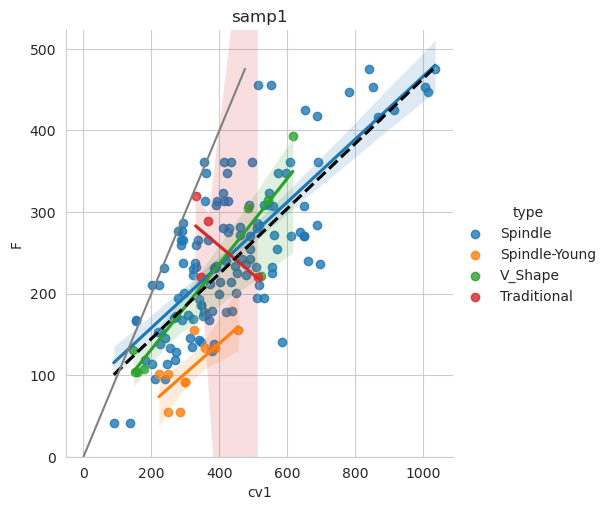

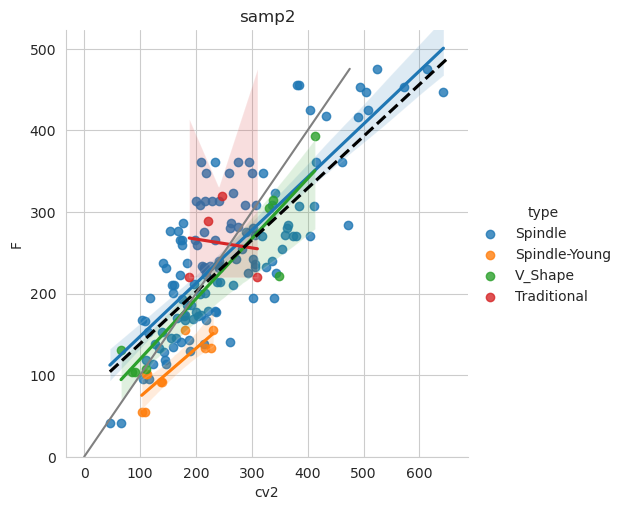

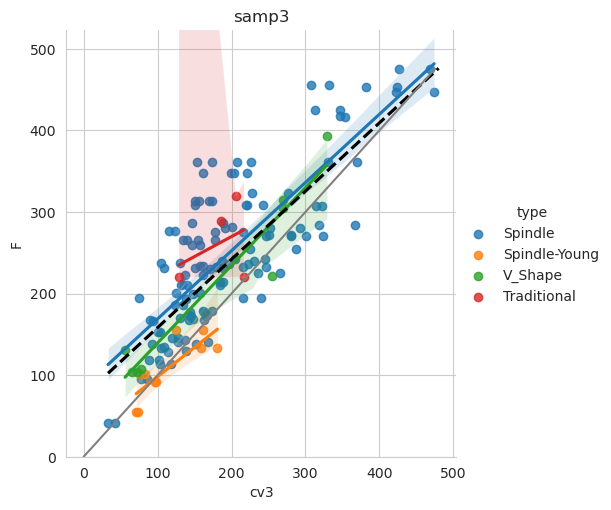

In [94]:
for i in range(1,4)    :
    plot_F_cv(df_f[~df_f["cv1"].isna()],i,"type", f"samp{i}")

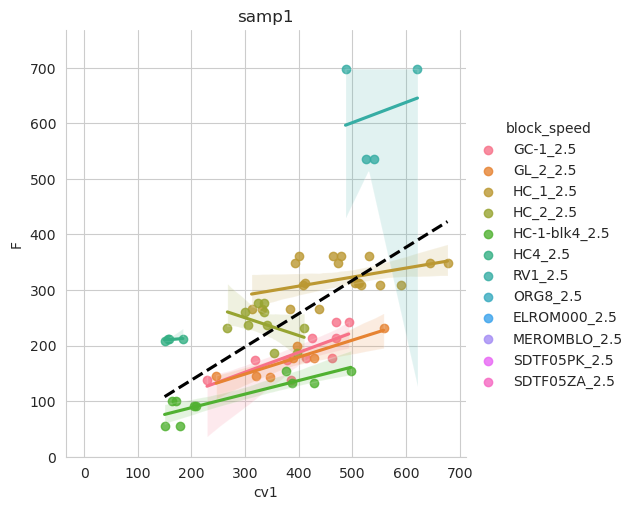

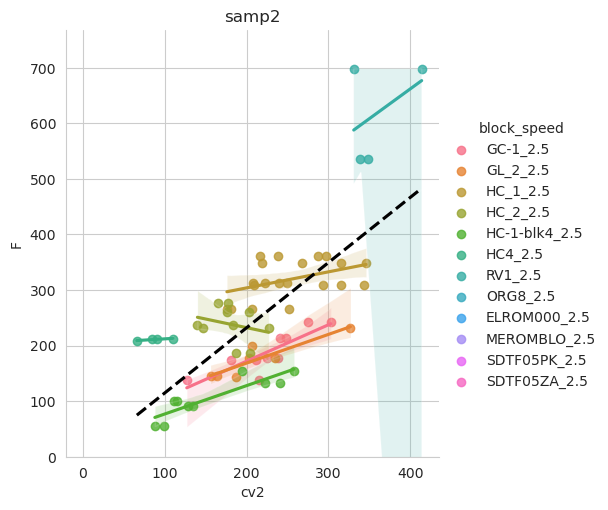

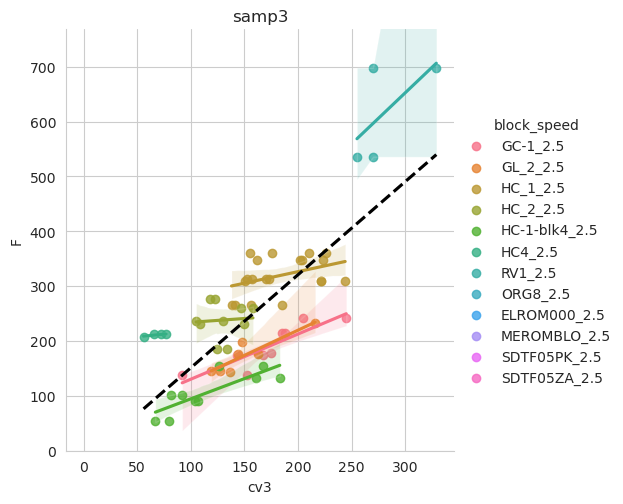

In [199]:
for i in range(1,4)    :
    plot_F_cv(df_f,i,"block_speed", f"samp{i}")

### Exporing new features

In [217]:
df_f["cv1/cv2"] = df_f["cv1"]/df_f["cv2"]
df_f["cv2/cv3"] = df_f["cv2"]/df_f["cv3"]
df_f["cv1/cv3"] = df_f["cv1"]/df_f["cv3"]
df_f["percent_hidden1"] = (df_f["F"]-df_f["cv1"])/df_f["F"]
df_f["percent_hidden2"] = (df_f["F"]-df_f["cv2"])/df_f["F"]
df_f["percent_hidden3"] = (df_f["F"]-df_f["cv3"])/df_f["F"]

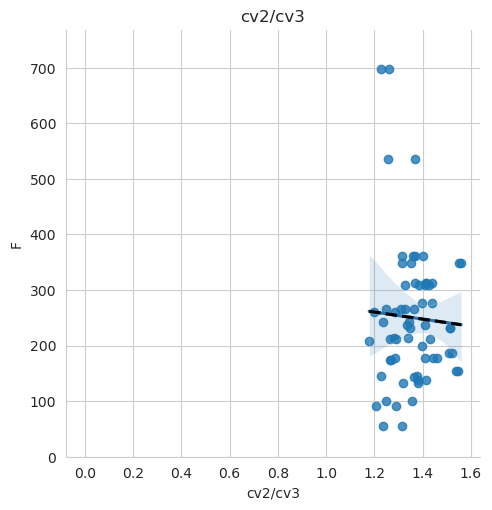

In [218]:
plot_F_cv(df_f, title= "cv2/cv3", col = "cv2/cv3")

### Modeling

In [95]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

from MHS.scoring import cross_validate_with_mean
from sklearn.linear_model import LinearRegression, PoissonRegressor

class MaxLinearRegressor(LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X, n_jobs=n_jobs)
    
    def predict(self, X):
        predicted_values = super().predict(X)
        return np.array([max(p, 0) for p in predicted_values])

In [96]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block"]}: row{x["tree"].split("_")[1]}', axis = 1)
#filter
# df = df[df["speed"] == 4].reset_index()
df = df[df["type"] == "Spindle"].reset_index()

groups = df["block"]

  
X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor(fit_intercept = False)
cross_validate_with_mean(model, X, y, groups=groups)

true: 8045.2,    pred: 8054.146089963364. (0.11 %) (MEROMBLO)
true: 6388.0,    pred: 4283.195027864315. (32.95 %) (HC_1)
true: 5657.2,    pred: 5951.003591392136. (5.19 %) (ELROM000)
true: 2859.16,    pred: 2973.173750258753. (3.99 %) (SDTF05PK)
true: 4181.0,    pred: 4679.3156274402245. (11.92 %) (SDTF05ZA)
true: 2382.0,    pred: 1599.47967187708. (32.85 %) (HC_2)
true: 1892.0,    pred: 2072.447119870208. (9.54 %) (GC-1)
true: 1220.0,    pred: 1361.71877417796. (11.62 %) (GC-2)
0.20980422429945816 0.07124379441414147


(0.1352066355234796, 0.11796428386930298)

In [97]:
df_f["type"].unique()

array(['Spindle', 'Spindle-Young', 'V_Shape', 'Traditional', nan],
      dtype=object)

array([ 5.,  4.,  2.,  6.,  9., 10., nan,  1.])

In [102]:
df = df_f.reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block"]}: {x["tree"].split("_")[1]}', axis = 1)
cv_col = "cv1"

mean_mape = []
for group in np.sort(df["group"].unique()):
    if np.isnan(group) or group==11:
        continue
    print(group)
    logic_vec = df["group"] == group
    X = df[logic_vec][[cv_col]].reset_index(drop = True)
    y = df[logic_vec]["F"].reset_index(drop = True)
    model = LinearRegression(fit_intercept = False)
    mean_res, std_res = cross_validate_with_mean(model, X, y,
                                                 groups=df[logic_vec]["row"].reset_index(drop = True))
    print((mean_res, std_res))
    mean_mape.append(mean_res)
    model.fit(X,y)
    print(model.coef_)
print((np.mean(mean_mape), np.std(mean_mape)))

1
true: 1429.36,    pred: 1181.0693171494672. (17.37 %) (SDTF05PK: 5)
true: 1429.8,    pred: 1713.8268870486058. (19.86 %) (SDTF05PK: 4)
true: 2090.0,    pred: 2368.8085061147535. (13.34 %) (SDTF05ZA: 8)
true: 2091.0,    pred: 1612.907247641279. (22.86 %) (SDTF05ZA: 7)
0.23554541133682452 0.04715250682237803
(0.18359997216047208, 0.034903808293389946)
[0.50759523]
2
true: 247.0,    pred: 280.77497294725754. (13.67 %) (HC-1-blk4: 17)
true: 247.0,    pred: 286.52862641865545. (16.00 %) (HC-1-blk4: 15)
true: 288.0,    pred: 276.0719675567169. (4.14 %) (HC-1-blk4: 14)
true: 288.0,    pred: 230.57571896260214. (19.94 %) (HC-1-blk4: 13)
0.23385033831478824 0.13402943654752816
(0.13439558749125313, 0.058163971646248494)
[0.34296582]
3
true: 2828.6,    pred: 2344.818277457528. (17.10 %) (ELROM000: 2)
true: 2828.6,    pred: 3130.1565819111174. (10.66 %) (ELROM000: 1)
0.24761881658985213 0.014123439904479118
(0.1388210253223484, 0.03221118939251828)
[0.55399614]
4
true: 1615.0,    pred: 1910.298

In [103]:
df = df_f.reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block"]}: {x["tree"].split("_")[1]}', axis = 1)
cv_col = "cv2"

mean_mape = []
for group in np.sort(df["group"].unique()):
    if np.isnan(group) or group==11:
        continue
    print(group)
    logic_vec = df["group"] == group
    X = df[logic_vec][[cv_col]].reset_index(drop = True)
    y = df[logic_vec]["F"].reset_index(drop = True)
    model = LinearRegression(fit_intercept = False)
    mean_res, std_res = cross_validate_with_mean(model, X, y,
                                                 groups=df[logic_vec]["row"].reset_index(drop = True))
    print((mean_res, std_res))
    mean_mape.append(mean_res)
    model.fit(X,y)
    print(model.coef_)
print((np.mean(mean_mape), np.std(mean_mape)))

1
true: 1429.36,    pred: 1151.4883564067927. (19.44 %) (SDTF05PK: 5)
true: 1429.8,    pred: 1511.7519017875609. (5.73 %) (SDTF05PK: 4)
true: 2090.0,    pred: 2400.6169775380145. (14.86 %) (SDTF05ZA: 8)
true: 2091.0,    pred: 1787.2201469282863. (14.53 %) (SDTF05ZA: 7)
0.1805844920688353 0.033824887891604
(0.13640503558466704, 0.04961510705741657)
[0.8308382]
2
true: 247.0,    pred: 237.44920294190098. (3.87 %) (HC-1-blk4: 17)
true: 247.0,    pred: 239.91685811421587. (2.87 %) (HC-1-blk4: 15)
true: 288.0,    pred: 309.5457822171705. (7.48 %) (HC-1-blk4: 14)
true: 288.0,    pred: 272.41345407503235. (5.41 %) (HC-1-blk4: 13)
0.15933242559205235 0.04750776209538672
(0.04906889432546976, 0.01740865387790572)
[0.67497128]
3
true: 2828.6,    pred: 2424.625632053188. (14.28 %) (ELROM000: 2)
true: 2828.6,    pred: 3136.954237258621. (10.90 %) (ELROM000: 1)
0.22097118867514925 0.03128293424784952
(0.12591540076458907, 0.016902377622886024)
[0.8649308]
4
true: 1615.0,    pred: 1968.0603253563522

array([ 1.,  2.,  4.,  5.,  6.,  9., 10., nan])

In [105]:
df = df_f.reset_index(drop = True).copy()
df["row"] = df.apply(lambda x: f'{x["block"]}: {x["tree"].split("_")[1]}', axis = 1)
cv_col = "cv3"

mean_mape = []
for group in np.sort(df["group"].unique()):
    if np.isnan(group):
        continue
    print(group)
    logic_vec = df["group"] == group
    X = df[logic_vec][[cv_col]].reset_index(drop = True)
    y = df[logic_vec]["F"].reset_index(drop = True)
    model = LinearRegression(fit_intercept = False)
    if group != 11:
        mean_res, std_res = cross_validate_with_mean(model, X, y,
                                                     groups=df[logic_vec]["row"].reset_index(drop = True))
        print((mean_res.round(2), std_res.round(2)))
        mean_mape.append(mean_res)
    model.fit(X,y)
    print(model.coef_.round(3))
print((np.mean(mean_mape), np.std(mean_mape)))

1
true: 1429.36,    pred: 1165.8198158434298. (18.44 %) (SDTF05PK: 5)
true: 1429.8,    pred: 1471.7198278068859. (2.93 %) (SDTF05PK: 4)
true: 2090.0,    pred: 2216.5280773675286. (6.05 %) (SDTF05ZA: 8)
true: 2091.0,    pred: 1980.7355588838418. (5.27 %) (SDTF05ZA: 7)
0.16412015297184757 0.028592319614163607
(0.08, 0.06)
[1.078]
2
true: 247.0,    pred: 222.80952145622285. (9.79 %) (HC-1-blk4: 17)
true: 247.0,    pred: 233.10574724155782. (5.63 %) (HC-1-blk4: 15)
true: 288.0,    pred: 301.38045425393113. (4.65 %) (HC-1-blk4: 14)
true: 288.0,    pred: 288.20113672922247. (0.07 %) (HC-1-blk4: 13)
0.16655589306686097 0.06640809424591126
(0.05, 0.03)
[0.927]
3
true: 2828.6,    pred: 2531.4737039127717. (10.50 %) (ELROM000: 2)
true: 2828.6,    pred: 3049.131105074195. (7.80 %) (ELROM000: 1)
0.18992650209132703 0.02970706209418053
(0.09, 0.01)
[1.083]
4
true: 1615.0,    pred: 2014.4223944773512. (24.73 %) (MEROMBLO: 2)
true: 1614.2999999999997,    pred: 1959.2605266572946. (21.37 %) (MEROMBLO:

In [101]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[df["type"] == "Spindle"].reset_index()
df["row"] = df.apply(lambda x: f'{x["block"]}: row{x["tree"].split("_")[1]}', axis = 1)

from sklearn.linear_model import LinearRegression, PoissonRegressor

X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
cross_validate_with_mean(model, X, y, groups=df["row"], ret_preds=True)
cross_validate_with_mean(model, X, y, groups=df["block"], ret_preds=True)
model.fit(X,y)
model.coef_

true: 1892.0,    pred: 2072.447119870208. (9.54 %) (GC-1: row2)
true: 2828.6,    pred: 3160.9459260213735. (11.75 %) (ELROM000: row1)
true: 2828.6,    pred: 2731.2706384417647. (3.44 %) (ELROM000: row2)
true: 1429.36,    pred: 1298.9391073411216. (9.12 %) (SDTF05PK: row5)
true: 1429.8,    pred: 1669.070350675389. (16.73 %) (SDTF05PK: row4)
true: 1615.0,    pred: 1686.0682981405394. (4.40 %) (MEROMBLO: row2)
true: 1614.2999999999997,    pred: 1603.325169754196. (0.68 %) (MEROMBLO: row1)
true: 2091.0,    pred: 2069.1513507868763. (1.04 %) (SDTF05ZA: row7)
true: 2090.0,    pred: 2538.4581360669895. (21.46 %) (SDTF05ZA: row8)
true: 1099.6000000000001,    pred: 1174.448033152737. (6.81 %) (MEROMBLO: row3)
true: 1099.0,    pred: 1435.09661966138. (30.58 %) (MEROMBLO: row4)
true: 1308.5,    pred: 1180.4898924948375. (9.78 %) (MEROMBLO: row5)
true: 1308.8,    pred: 909.0818502595524. (30.54 %) (MEROMBLO: row6)
true: 1191.0,    pred: 872.6372071202203. (26.73 %) (HC_2: row4)
true: 1597.0,    pr

array([0.9195014])

In [225]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[df["type"] == "Spindle-Young"].reset_index()
df["row"] = df.apply(lambda x: f'{x["block"]}: row{x["tree"].split("_")[1]}', axis = 1)

from sklearn.linear_model import LinearRegression, PoissonRegressor

X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
cross_validate_with_mean(model, X, y, groups=df["row"], ret_preds=True)
model.fit(X,y)
model.coef_

true: 247.0,    pred: 212.65544994268242. (13.90 %) (HC-1-blk4: row17)
true: 247.0,    pred: 219.7247121232761. (11.04 %) (HC-1-blk4: row15)
true: 288.0,    pred: 329.8645367780631. (14.54 %) (HC-1-blk4: row14)
true: 288.0,    pred: 284.4618055555557. (1.23 %) (HC-1-blk4: row13)
0.15677707175049005 0.02219507796497833


array([0.6523113])

In [226]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[df["type"] == "V_Shape"].reset_index()
df = df[~df["F_V"].isna()].reset_index()
df["row"] = df.apply(lambda x: f'{x["block"]}: row{x["tree"].split("_")[1]}', axis = 1)
from sklearn.linear_model import LinearRegression, PoissonRegressor

X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F_V"]
model = LinearRegression(fit_intercept = False)
cross_validate_with_mean(model, X, y, groups=df["row"], ret_preds=True)
cross_validate_with_mean(model, X, y, groups=df["block"], ret_preds=True)
model.fit(X,y)
model.coef_

true: 698.0,    pred: 737.8940210709991. (5.72 %) (RV1: row9)
true: 698.0,    pred: 550.6387475004548. (21.11 %) (RV1: row8)
true: 536.0,    pred: 633.0633554599851. (18.11 %) (RV1: row7)
true: 536.0,    pred: 609.3718393448656. (13.69 %) (RV1: row6)
true: 208.0,    pred: 114.91432920399431. (44.75 %) (HC4: row7)
true: 212.0,    pred: 192.32017650746636. (9.28 %) (HC4: row6)
true: 212.0,    pred: 148.10593714049733. (30.14 %) (HC4: row5)
true: 212.0,    pred: 158.6559516772573. (25.16 %) (HC4: row3)
0.20995208981998884 0.11714115925878714
true: 2468.0,    pred: 3333.8927476378194. (35.08 %) (RV1)
true: 844.0,    pred: 604.3317499840634. (28.40 %) (HC4)
0.3260673708003262 0.04129240713680368


array([1.75230378])

In [208]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[df["type"] == "Spindle"].reset_index()
from sklearn.linear_model import LinearRegression, PoissonRegressor

X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
model.fit(X,y)
model.coef_

array([1.09230424])

In [209]:
# from sklearn.externals import joblib

# def save_model(model, filename):
#     """
#     Save an sklearn model to a file.
    
#     Parameters:
#         model (object): The sklearn model object to be saved.
#         filename (str): The name of the file to save the model to.
#     """
#     joblib.dump(model, filename)

# def load_model(filename):
#     """
#     Load an sklearn model from a file.
    
#     Parameters:
#         filename (str): The name of the file to load the model from.
        
#     Returns:
#         object: The loaded sklearn model object.
#     """
#     return joblib.load(filename)


## V -shape

In [210]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[~df["F_V"].isna()]
#filter
df = df[df["depth_filter"] == 5].reset_index(drop = True)
# df = df[df["speed"] == 2.5].reset_index()

groups = df["block"]

  
X = df[["cv3"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F_V"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor()
y_pred = cross_validate_with_mean(model, X, y, groups=groups, ret_preds=True)
cross_validate_with_mean(model, X, y, groups=groups)

true: 2468.0,    pred: 3457.364794410105. (40.09 %) (RV1)
true: 844.0,    pred: 594.1248581798122. (29.61 %) (HC4)
0.3548603838750514 0.05826350011589865
true: 2468.0,    pred: 3457.364794410105. (40.09 %) (RV1)
true: 844.0,    pred: 594.1248581798122. (29.61 %) (HC4)
0.3548603838750514 0.05826350011589865


(0.3484688698982886, 0.05240827532460643)

In [211]:
cv_cols = [f"cv{i}" for i in range(1,4)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df[cv_F_col] = df[cv_col]/df["F"]

    display(df.groupby("speed")[cv_F_cols].mean())
display(df.groupby(["speed", "block"])[cv_F_cols].mean())
display(df.groupby("side")[cv_F_cols].mean())

,cv1/F,cv2/F,cv3/F
speed,,,
2.5,0.831158,0.50216,0.390128


,cv1/F,cv2/F,cv3/F
speed,,,
2.5,0.831158,0.50216,0.390128


,cv1/F,cv2/F,cv3/F
speed,,,
2.5,0.831158,0.50216,0.390128


cv1/F     cv2/F     cv3/F
speed block                              
2.5   HC4    0.768732  0.416591  0.320845
      RV1    0.893583  0.587729  0.459411

,cv1/F,cv2/F,cv3/F
side,,,
A,0.797755,0.484216,0.385374
B,0.864560,0.520105,0.394883


In [212]:
df = df_f[~df_f["cv1"].isna()].reset_index(drop = True).copy()
df = df[~df["F_V"].isna()]#filter
df = df[df["depth_filter"] == 5].reset_index()
# df = df[df["speed"] == 2.5].reset_index()

groups = df["block"]
  
X = df[["cv2"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F_V"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor()
y_pred = cross_validate_with_mean(model, X, y, groups=None, ret_preds=True)
cross_validate_with_mean(model, X, y, groups=None)

true: 208.0,    pred: 114.91432920399431. (44.75 %) 
true: 698.0,    pred: 737.8940210709991. (5.72 %) 
true: 536.0,    pred: 633.0633554599851. (18.11 %) 
true: 698.0,    pred: 550.6387475004548. (21.11 %) 
true: 212.0,    pred: 192.32017650746636. (9.28 %) 
true: 212.0,    pred: 148.10593714049733. (30.14 %) 
true: 212.0,    pred: 158.6559516772573. (25.16 %) 
true: 536.0,    pred: 609.3718393448656. (13.69 %) 
0.20995208981998884 0.11714115925878714
true: 208.0,    pred: 114.91432920399431. (44.75 %) 
true: 698.0,    pred: 737.8940210709991. (5.72 %) 
true: 536.0,    pred: 633.0633554599851. (18.11 %) 
true: 698.0,    pred: 550.6387475004548. (21.11 %) 
true: 212.0,    pred: 192.32017650746636. (9.28 %) 
true: 212.0,    pred: 148.10593714049733. (30.14 %) 
true: 212.0,    pred: 158.6559516772573. (25.16 %) 
true: 536.0,    pred: 609.3718393448656. (13.69 %) 
0.20995208981998884 0.11714115925878714


(0.20995208981998884, 0.11714115925878714)

In [213]:
cv_cols = [f"cv{i}" for i in range(1,4)]
cv_F_cols = [f"{col}/F_V" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df[cv_F_col] = df[cv_col]/df["F_V"]

display(df[cv_F_cols].mean())
display(df.groupby("speed")[cv_F_cols].mean())
display(df.groupby(["speed", "block"])[cv_F_cols].mean())
display(df.groupby("side")[cv_F_cols].mean())

cv1/F_V    0.831158
cv2/F_V    0.502160
cv3/F_V    0.390128
dtype: float64

,cv1/F_V,cv2/F_V,cv3/F_V
speed,,,
2.5,0.831158,0.50216,0.390128


cv1/F_V   cv2/F_V   cv3/F_V
speed block                              
2.5   HC4    0.768732  0.416591  0.320845
      RV1    0.893583  0.587729  0.459411

,cv1/F_V,cv2/F_V,cv3/F_V
side,,,
A,0.797755,0.484216,0.385374
B,0.864560,0.520105,0.394883


## combining A+B results

need to map section to block

In [214]:
df_comb = df_f_org.groupby(["section", "speed"]).mean()
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_comb[cv_F_col] = df_comb[cv_col]/df_comb["F"]
df_comb

/tmp/ipykernel_26552/2130146072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_comb = df_f_org.groupby(["section", "speed"]).mean()


,,Unnamed: 0,depth_filter,plant_dist,n_trees,sec_length,cv1,cv2,cv3,F,F_V,...,old_cv3,cv1/F,cv2/F,cv3/F,old_cv1/F,old_cv2/F,old_cv3/F,cv1/F_V,cv2/F_V,cv3/F_V
section,speed,,,,,,,,,,,,,,,,,,,,,
1,2.5,48.5,5.0,2.428571,1.857143,5.714286,271.250000,154.250000,108.000000,170.942857,NaN,...,166.857143,1.837272,1.084944,0.777467,1.566425,1.192418,0.994758,1.586788,0.902348,0.631790
"1,2",2.5,NaN,5.0,0.000000,2.000000,0.000000,NaN,NaN,NaN,211.000000,NaN,...,270.500000,NaN,NaN,NaN,1.672986,1.514218,1.281991,NaN,NaN,NaN
"1,2,3",2.5,NaN,5.0,0.000000,3.000000,0.000000,NaN,NaN,NaN,219.666667,NaN,...,158.333333,NaN,NaN,NaN,0.998635,0.841529,0.709444,NaN,NaN,NaN
"1,2,3,4",2.5,NaN,5.0,0.000000,4.000000,0.000000,NaN,NaN,NaN,141.100000,NaN,...,167.000000,NaN,NaN,NaN,1.498795,1.367694,1.183438,NaN,NaN,NaN
10,2.5,12.5,5.0,3.000000,2.000000,6.000000,409.000000,219.000000,153.500000,177.000000,NaN,...,86.500000,2.310734,1.237288,0.867232,0.898305,0.587571,0.488701,2.310734,1.237288,0.867232
"10,11",2.5,NaN,5.0,0.000000,2.000000,0.000000,NaN,NaN,NaN,221.800000,NaN,...,227.666667,NaN,NaN,NaN,1.387262,1.207614,1.048361,NaN,NaN,NaN
"10,11,12",2.5,NaN,5.0,0.000000,3.000000,0.000000,NaN,NaN,NaN,307.000000,NaN,...,257.500000,NaN,NaN,NaN,1.109121,0.985342,0.838762,NaN,NaN,NaN
"10,9",2.5,NaN,5.0,0.000000,2.000000,0.000000,NaN,NaN,NaN,231.000000,NaN,...,160.000000,NaN,NaN,NaN,0.935065,0.818182,0.692641,NaN,NaN,NaN
11,2.5,27.5,5.0,3.000000,2.000000,6.000000,546.750000,287.000000,197.750000,348.000000,NaN,...,139.500000,1.571121,0.824713,0.568247,0.672414,0.479885,0.400862,1.571121,0.824713,0.568247


In [215]:
sections = [i[0] for i in df_comb.index]

In [216]:
def sec_to_block(section):
    if section<=5:
        return "HC-2"
    if section<=10 or (section>=25 and section<=29):
        return "GL-2"
    if section<=15:
        return "HC-1"
    return "GL-1"
blocks = [sec_to_block(sec) for sec in sections]
df_comb["block"] = blocks

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
df = df_comb.reset_index()
#filter
# df = df[df["speed"] == 4].reset_index()
# df = df[df["speed"] == 2.5].reset_index()

groups = df["block"]

  
X = df[["cv2", "cv3"]]
# X["cv2^2"] = X["cv2"]**2
y = df["F"]
model = LinearRegression(fit_intercept = False)
# model = MaxLinearRegressor()
y_pred = cross_validate_with_mean(model, X, y, groups=groups, ret_preds=True)
cross_validate_with_mean(model, X, y, groups=groups)